# Import and process the data

In [2]:
# import libraries
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler
# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
X = iris.data.features
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = iris.data.targets

In [3]:
y["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
y = y.copy()
y["class"] = y["class"].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y

/tmp/ipython-input-497275139.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y["class"] = y["class"].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})


,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
df = X.copy()
df["species"] = y

# Exploratory Data Analysis
---

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [7]:
# Convert data into tensors

# convert to a pytorch tensor
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).float()
labels = labels.view(-1, 1)
labels.shape

torch.Size([150, 1])

In [8]:
labels=labels.squeeze().long()

# Create the ANN model

In [9]:
# model architecture
ANN_model = nn.Sequential(
    nn.Linear(4,64),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(64,64),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(64,64),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(64,3),   # output layer
      )

# loss function
lossfunc = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANN_model.parameters(),lr=.01)

# Train the model

In [10]:
epochs = 1000

# initialize losses
losses = torch.zeros(epochs)
Acc = []

# loop over epochs
for i in range(epochs):

  # forward pass
  pred = ANN_model(data)

  # compute loss
  loss = lossfunc(pred,labels)
  losses[i] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(pred,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
  Acc.append( accuracyPct )              # add to list of accuracies



# final forward pass
predictions = ANN_model(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

In [11]:
pred

tensor([[ 3.5134e+00,  9.6633e-02, -3.5654e+00],
        [ 3.2181e+00,  1.2735e-01, -3.2901e+00],
        [ 3.3553e+00,  1.0760e-01, -3.4092e+00],
        [ 3.2821e+00,  1.1516e-01, -3.3423e+00],
        [ 3.5629e+00,  9.1253e-02, -3.6108e+00],
        [ 3.4540e+00,  1.4902e-01, -3.5578e+00],
        [ 3.4069e+00,  1.0553e-01, -3.4607e+00],
        [ 3.4549e+00,  1.0155e-01, -3.5095e+00],
        [ 3.1623e+00,  1.2468e-01, -3.2268e+00],
        [ 3.3370e+00,  1.0938e-01, -3.3962e+00],
        [ 3.6017e+00,  9.2044e-02, -3.6560e+00],
        [ 3.4475e+00,  1.0054e-01, -3.5004e+00],
        [ 3.2800e+00,  1.1331e-01, -3.3397e+00],
        [ 3.2827e+00,  1.0733e-01, -3.3324e+00],
        [ 3.7635e+00,  8.6140e-02, -3.8200e+00],
        [ 3.7805e+00,  1.0807e-01, -3.8558e+00],
        [ 3.5716e+00,  1.1230e-01, -3.6406e+00],
        [ 3.4484e+00,  1.0874e-01, -3.5107e+00],
        [ 3.4401e+00,  1.5161e-01, -3.5479e+00],
        [ 3.6053e+00,  9.2198e-02, -3.6575e+00],
        [ 3.3605e+00

In [12]:
torch.argmax(pred,axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Visualize the results

Final accuracy: 95.3333%


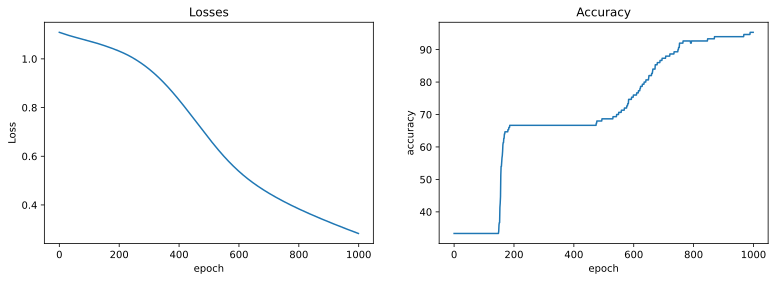

In [13]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(Acc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

In [14]:
# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(sm(pred),axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

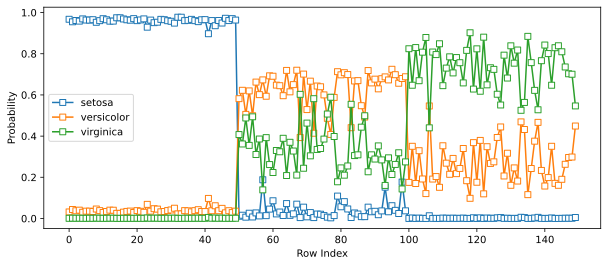

In [15]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(sm(pred.detach()),'s-',markerfacecolor='w')
plt.xlabel('Row Index')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

# Experiments
---

1. Decrease the number of hidden layers to 1 and compare the result with that of the original architecture.
2. Decrease the number of hidden layers to 1 but increase the number of hidden units from 16 to 32 and compare the result with that of the original architecture.
3. Increase the number of hidden layers to 4 and compare the result with that of the original architecture.
4. Increase the number of hidden layers to 4 but increase the number of hidden units from 16 to 32 and compare the result with that of the original architecture.
5. Increase the number of hidden layers to 4 but decrease the number of hidden units from 16 to 8 and compare the result with that of the original architecture.
6. Perform a learning rate experiment similar to the previous discussion, what have you discovered?

In [43]:
# EXPERIMENTS
# Multiclass Classification Experiment (Iris Dataset)
# Focus: Initialization, Depth, Width, and Learning Rate Effects
# 8, 16, 32, 64

import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

SEED = 619
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

DEVICE = torch.device("cpu") # 'cuda' but alaws gpu
EPOCHS = 500
LR_DEFAULT = 0.01
TEST_SIZE = 0.2
BATCH = None

OUTPUT_DIR = "iris_experiment_outputs_1"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# my dataset
iris = load_iris()
X = iris["data"]
y = iris["target"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=TEST_SIZE, random_state=SEED, stratify=y
)

X_train_t = torch.tensor(X_train, dtype=torch.float32).to(DEVICE)
y_train_t = torch.tensor(y_train, dtype=torch.long).to(DEVICE)
X_test_t = torch.tensor(X_test, dtype=torch.float32).to(DEVICE)
y_test_t = torch.tensor(y_test, dtype=torch.long).to(DEVICE)

# model builder
def build_mlp(structure):
    layers = []
    for i in range(len(structure) - 1):
        layers.append(nn.Linear(structure[i], structure[i + 1]))
        if i < len(structure) - 2:
            layers.append(nn.ReLU())
    return nn.Sequential(*layers).to(DEVICE)

# training loop
def train_model(model, loss_fn, optimizer, X, y, epochs=EPOCHS):
    model.train()
    losses, accs = [], []
    for ep in range(epochs):
        logits = model(X)
        loss = loss_fn(logits, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            preds = torch.argmax(model(X), dim=1)
            acc = 100 * (preds == y).float().mean().item()
        losses.append(loss.item())
        accs.append(acc)
    return np.array(losses), np.array(accs)

def evaluate_model(model, X, y):
    model.eval()
    with torch.no_grad():
        logits = model(X)
        preds = torch.argmax(logits, dim=1)
        acc = 100 * (preds == y).float().mean().item()
    return acc, preds.cpu().numpy()

def plot_loss_acc(losses, accs, title, outdir):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(losses, linewidth=0.8)
    plt.title(f"{title} — Loss")
    plt.xlabel("Epoch"); plt.ylabel("Loss")

    plt.subplot(1,2,2)
    plt.plot(accs, linewidth=0.8)
    plt.title(f"{title} — Accuracy")
    plt.xlabel("Epoch"); plt.ylabel("Accuracy (%)")
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, f"{title.replace(' ','_')}_loss_acc.png"))
    plt.close()

def plot_confusion(y_true, y_pred, labels, title, outdir):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.title(f"{title} — Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, f"{title.replace(' ','_')}_confusion.png"))
    plt.close()
    return cm

# set up the experiment
arch_experiments = [
    {"name": "Exp1_1layer_16", "structure": [4, 16, 3]},
    {"name": "Exp2_1layer_32", "structure": [4, 32, 3]},
    {"name": "Exp3_4layers_16", "structure": [4, 16, 16, 16, 16, 3]},
    {"name": "Exp4_4layers_32", "structure": [4, 32, 32, 32, 32, 3]},
    {"name": "Exp5_4layers_8",  "structure": [4, 8, 8, 8, 8, 3]},
    {"name": "Baseline_3layers_64", "structure": [4, 64, 64, 64, 3]},
]

# run experiment
summary_results = []

for spec in arch_experiments:
    name = spec["name"]
    structure = spec["structure"]
    print(f"\n▶ Running {name} | Structure = {structure}")
    model = build_mlp(structure)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=LR_DEFAULT)

    losses, accs = train_model(model, loss_fn, optimizer, X_train_t, y_train_t)
    train_acc, _ = evaluate_model(model, X_train_t, y_train_t)
    test_acc, preds = evaluate_model(model, X_test_t, y_test_t)

    print(f"→ Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}%")
    plot_loss_acc(losses, accs, name, OUTPUT_DIR)
    cm = plot_confusion(y_test_t.cpu().numpy(), preds, iris["target_names"], name, OUTPUT_DIR)

    report = classification_report(
    y_test_t.cpu().numpy(),
    preds,
    target_names=iris["target_names"],
    zero_division=0
    )
    with open(os.path.join(OUTPUT_DIR, f"{name}_report.txt"), "w") as f:
      f.write(f"Structure: {structure}\nTrain acc: {train_acc:.2f}\nTest acc: {test_acc:.2f}\n\n")
      f.write("Classification Report:\n")
      f.write(report)
      summary_results.append({"name": name, "train_acc": train_acc, "test_acc": test_acc})

# learning rate experiment
print("\n▶ Learning Rate Sensitivity (Baseline_3layers_64)")
lr_grid = [0.001, 0.005, 0.01, 0.02, 0.05]
lr_results = []

for lr in lr_grid:
    model = build_mlp([4,64,64,64,3])
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    losses, accs = train_model(model, loss_fn, optimizer, X_train_t, y_train_t)
    train_acc, _ = evaluate_model(model, X_train_t, y_train_t)
    test_acc, preds = evaluate_model(model, X_test_t, y_test_t)
    lr_results.append({"lr": lr, "train_acc": train_acc, "test_acc": test_acc})
    print(f"LR = {lr:.4f} → Train: {train_acc:.2f}%, Test: {test_acc:.2f}%")
    plot_loss_acc(losses, accs, f"LR_{lr}", OUTPUT_DIR)
    plot_confusion(y_test_t.cpu().numpy(), preds, iris["target_names"], f"LR_{lr}", OUTPUT_DIR)

# bar chart summary
names = [r["name"] for r in summary_results]
test_accs = [r["test_acc"] for r in summary_results]

plt.figure(figsize=(9,5))
bars = plt.barh(names, test_accs, color="cornflowerblue")
plt.xlabel("Test Accuracy (%)")
plt.title("Test Accuracy by Architecture (Iris Classification)")
for i, v in enumerate(test_accs):
    plt.text(v + 0.5, i, f"{v:.2f} %", va= "center")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "summary_test_accuracy_by_architecture.png"))
plt.close()

# lr summary plot
plt.figure(figsize=(6,4))
plt.plot([r["lr"] for r in lr_results], [r["test_acc"] for r in lr_results], marker= "o")
plt.xscale("log")
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Test Accuracy (%)")
plt.title("Learning Rate Sensitivity — Baseline (3×64)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "learning_rate_sensitivity.png"))
plt.close()

print("\nALL EXPERIMENTS COMPLETE")
print(f"Results saved in folder: {OUTPUT_DIR}")



▶ Running Exp1_1layer_16 | Structure = [4, 16, 3]
→ Train Acc: 69.17% | Test Acc: 66.67%

▶ Running Exp2_1layer_32 | Structure = [4, 32, 3]
→ Train Acc: 71.67% | Test Acc: 66.67%

▶ Running Exp3_4layers_16 | Structure = [4, 16, 16, 16, 16, 3]
→ Train Acc: 47.50% | Test Acc: 40.00%

▶ Running Exp4_4layers_32 | Structure = [4, 32, 32, 32, 32, 3]
→ Train Acc: 66.67% | Test Acc: 66.67%

▶ Running Exp5_4layers_8 | Structure = [4, 8, 8, 8, 8, 3]
→ Train Acc: 33.33% | Test Acc: 33.33%

▶ Running Baseline_3layers_64 | Structure = [4, 64, 64, 64, 3]
→ Train Acc: 66.67% | Test Acc: 66.67%

▶ Learning Rate Sensitivity (Baseline_3layers_64)
LR = 0.0010 → Train: 33.33%, Test: 33.33%
LR = 0.0050 → Train: 66.67%, Test: 66.67%
LR = 0.0100 → Train: 67.50%, Test: 66.67%
LR = 0.0200 → Train: 87.50%, Test: 86.67%
LR = 0.0500 → Train: 98.33%, Test: 93.33%

ALL EXPERIMENTS COMPLETE
Results saved in folder: iris_experiment_outputs_1


In [42]:
# EXPLORING DIFFERENT LAYER (Note: Confused about Exp5_4layers_8 results)
# Requires: torch, sklearn, matplotlib, numpy, pandas, seaborn
# Run in an environment where plotting is supported.
# Exploring using 8, 64, 128

import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

SEED = 619
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

DEVICE = torch.device("cpu")     # alaws 'cuda' RuntimeError: Found no NVIDIA driver on your system.
EPOCHS = 1000
LR_DEFAULT = 0.01
TEST_SIZE = 0.2
BATCH = None

OUTPUT_DIR = "iris_experiments_outputs_1"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Data: Iris
iris = load_iris()
X = iris["data"]
y = iris["target"]

scaler = MinMaxScaler()
Xs = scaler.fit_transform(X)

# train / test split (stratified so class proportions are preserved)
X_train, X_test, y_train, y_test = train_test_split(
    Xs, y, test_size=TEST_SIZE, random_state=SEED, stratify=y
)

X_train_t = torch.tensor(X_train, dtype=torch.float32).to(DEVICE)
y_train_t = torch.tensor(y_train, dtype=torch.long).to(DEVICE)
X_test_t = torch.tensor(X_test, dtype=torch.float32).to(DEVICE)
y_test_t = torch.tensor(y_test, dtype=torch.long).to(DEVICE)

def build_mlp(structure, final_activation=None):
    """
    structure: list of units including input and output sizes, e.g. [4,64,64,3]
    final_activation: None or 'softmax' (we will not add softmax layer here because
                      CrossEntropyLoss expects logits)
    """
    layers = []
    for i in range(len(structure)-1):
        layers.append(nn.Linear(structure[i], structure[i+1]))
        # add ReLU after all but the final linear
        if i < len(structure)-2:
            layers.append(nn.ReLU())
    model = nn.Sequential(*layers).to(DEVICE)
    return model

def train_model(model, loss_fn, optimizer, X, y, epochs=EPOCHS, batch_size=None):
    model.train()
    n = X.shape[0]
    losses = []
    accs = []
    for ep in range(epochs):
        if batch_size is None:
            # full-batch
            logits = model(X)
            loss = loss_fn(logits, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        else:
            # mini-batch
            perm = torch.randperm(n)
            loss = 0.0
            for i in range(0, n, batch_size):
                idx = perm[i:i+batch_size]
                xb = X[idx]
                yb = y[idx]
                logits = model(xb)
                l = loss_fn(logits, yb)
                optimizer.zero_grad()
                l.backward()
                optimizer.step()
                loss += l.item()
            loss = loss / (n / batch_size)
        # logging
        with torch.no_grad():
            preds = torch.argmax(model(X), dim=1)
            acc = 100.0 * (preds == y).float().mean().item()
        losses.append(loss.item() if isinstance(loss, torch.Tensor) else loss)
        accs.append(acc)
    return np.array(losses), np.array(accs)

def evaluate_model(model, X, y):
    model.eval()
    with torch.no_grad():
        logits = model(X)
        preds = torch.argmax(logits, dim=1)
        acc = 100.0 * (preds == y).float().mean().item()
    return acc, preds.cpu().numpy()

def plot_loss_accuracy(losses, accs, title_prefix, outdir):
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    ax[0].plot(losses, marker='.', linewidth=0.5)
    ax[0].set_title(f"{title_prefix} — Loss")
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")
    ax[1].plot(accs, marker='.', linewidth=0.5)
    ax[1].set_title(f"{title_prefix} — Accuracy")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Accuracy (%)")
    plt.tight_layout()
    fname = os.path.join(outdir, f"{title_prefix.replace(' ','_')}_loss_acc.png")
    plt.savefig(fname)
    plt.close(fig)

def plot_confusion(y_true, y_pred, classes, title_prefix, outdir):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax,
                xticklabels=classes, yticklabels=classes)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title(f"{title_prefix} — Confusion Matrix")
    plt.tight_layout()
    fname = os.path.join(outdir, f"{title_prefix.replace(' ','_')}_confusion.png")
    plt.savefig(fname)
    plt.close(fig)
    return cm

# Experiments
# 1. Single hidden layer (64)
# 2. Single hidden layer (128)
# 3. Four hidden layers (64 each)
# 4. Four hidden layers (128 each)
# 5. Four hidden layers (8 each)
# 6. Baseline original: three hidden layers (64 each)  <-- for baseline reference

arch_experiments = [
    {"name":"Exp1_1layer_64", "structure":[4,64,3]},
    {"name":"Exp2_1layer_128", "structure":[4,128,3]},
    {"name":"Exp3_4layers_64", "structure":[4,64,64,64,64,3]},
    {"name":"Exp4_4layers_128", "structure":[4,128,128,128,128,3]},
    {"name":"Exp5_4layers_8", "structure":[4,8,8,8,8,3]},
    {"name":"Baseline_3layers_64", "structure":[4,64,64,64,3]},
]

# Learning rates to test in experiment 6
lr_grid = [0.001, 0.005, 0.01, 0.02, 0.05]

# Run experiments sequentially (Precise: EPOCHS per run)
summary_results = []

for spec in arch_experiments:
    arch_name = spec["name"]
    struct = spec["structure"]
    print(f"\n▶ Running {arch_name} | structure={struct} ")
    model = build_mlp(struct).to(DEVICE)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=LR_DEFAULT)
    losses, accs = train_model(model, loss_fn, optimizer, X_train_t, y_train_t, epochs=EPOCHS, batch_size=BATCH)
    train_acc, _ = evaluate_model(model, X_train_t, y_train_t)
    test_acc, test_preds = evaluate_model(model, X_test_t, y_test_t)
    print(f"{arch_name} -> Train acc: {train_acc:.2f}%, Test acc: {test_acc:.2f}%")
    # saved plots per experiment
    title_prefix = f"{arch_name}"
    plot_loss_accuracy(losses, accs, title_prefix, OUTPUT_DIR)
    cm = plot_confusion(y_test_t.cpu().numpy(), test_preds, iris["target_names"], title_prefix, OUTPUT_DIR)
    # classification report
    creport = classification_report(y_test_t.cpu().numpy(), test_preds, target_names=iris["target_names"], digits=4)
    report = classification_report(
    y_test_t.cpu().numpy(),
    preds,
    target_names=iris["target_names"],
    zero_division=0
    )
    with open(os.path.join(OUTPUT_DIR, f"{arch_name}_report.txt"), "w") as f:
        f.write(f"Architecture: {struct}\n▶ Learning rate used: {LR_DEFAULT}\n")
        f.write(f"Train acc: {train_acc:.4f}\nTest acc: {test_acc:.4f}\n\n")
        f.write("Confusion Matrix:\n")
        f.write(np.array2string(cm))
        f.write("\n\nClassification Report:\n")
        f.write(creport)
    summary_results.append({
        "name":arch_name,
        "structure":struct,
        "train_acc":train_acc,
        "test_acc":test_acc,
        "report": creport
    })

# Learning rate sensitivity (for baseline architecture)
print("\n▶ Learning rate sensitivity on Baseline_3layers_64 ")
lr_results = []
baseline_struct = [4,64,64,64,3]
for lr in lr_grid:
    model = build_mlp(baseline_struct).to(DEVICE)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    losses, accs = train_model(model, loss_fn, optimizer, X_train_t, y_train_t, epochs=EPOCHS, batch_size=BATCH)
    train_acc, _ = evaluate_model(model, X_train_t, y_train_t)
    test_acc, test_preds = evaluate_model(model, X_test_t, y_test_t)
    print(f"LR={lr:.4f} -> Train acc: {train_acc:.2f}%, Test acc: {test_acc:.2f}%")
    title_prefix = f"LR_sensitivity_lr_{str(lr).replace('.','p')}"
    plot_loss_accuracy(losses, accs, title_prefix, OUTPUT_DIR)
    cm = plot_confusion(y_test_t.cpu().numpy(), test_preds, iris["target_names"], title_prefix, OUTPUT_DIR)
    lr_results.append({"lr":lr, "train_acc":train_acc, "test_acc":test_acc})

# saved LR sensitivity summary
with open(os.path.join(OUTPUT_DIR, "lr_sensitivity_summary.txt"), "w") as f:
    for r in lr_results:
        f.write(f"lr {r['lr']}: train_acc={r['train_acc']:.4f}, test_acc={r['test_acc']:.4f}\n")

# Summary bar chart: test accuracies across architectures
names = [r["name"] for r in summary_results]
test_accs = [r["test_acc"] for r in summary_results]

fig, ax = plt.subplots(figsize=(10,5))
bars = ax.barh(range(len(names)), test_accs, color="skyblue")
ax.set_yticks(range(len(names)))
ax.set_yticklabels(names)
ax.set_xlabel("Test Accuracy (%)")
ax.set_title("Test Accuracy by Architecture (Iris)")
for i, v in enumerate(test_accs):
    ax.text(v + 0.5, i, f"{v:.2f}%", va="center")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "summary_test_accuracy_by_architecture.png"))
plt.close(fig)

print("\nALL EXPERIMENTS COMPLETE")
print(f"Outputs saved to folder: {OUTPUT_DIR}")
print("Per-experiment: loss+accuracy plots, confusion matrices and classification reports are available.")
print("Summary test accuracy bar chart saved as: summary_test_accuracy_by_architecture.png")



▶ Running Exp1_1layer_64 | structure=[4, 64, 3] 
Exp1_1layer_64 -> Train acc: 95.00%, Test acc: 93.33%

▶ Running Exp2_1layer_128 | structure=[4, 128, 3] 
Exp2_1layer_128 -> Train acc: 95.00%, Test acc: 80.00%

▶ Running Exp3_4layers_64 | structure=[4, 64, 64, 64, 64, 3] 
Exp3_4layers_64 -> Train acc: 74.17%, Test acc: 80.00%

▶ Running Exp4_4layers_128 | structure=[4, 128, 128, 128, 128, 3] 
Exp4_4layers_128 -> Train acc: 95.83%, Test acc: 93.33%

▶ Running Exp5_4layers_8 | structure=[4, 8, 8, 8, 8, 3] 
Exp5_4layers_8 -> Train acc: 65.00%, Test acc: 63.33%


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



▶ Running Baseline_3layers_64 | structure=[4, 64, 64, 64, 3] 
Baseline_3layers_64 -> Train acc: 93.33%, Test acc: 96.67%

▶ Learning rate sensitivity on Baseline_3layers_64 
LR=0.0010 -> Train acc: 64.17%, Test acc: 66.67%
LR=0.0050 -> Train acc: 68.33%, Test acc: 66.67%
LR=0.0100 -> Train acc: 93.33%, Test acc: 93.33%
LR=0.0200 -> Train acc: 98.33%, Test acc: 93.33%
LR=0.0500 -> Train acc: 98.33%, Test acc: 86.67%

ALL EXPERIMENTS COMPLETE
Outputs saved to folder: iris_experiments_outputs
Per-experiment: loss+accuracy plots, confusion matrices and classification reports are available.
Summary test accuracy bar chart saved as: summary_test_accuracy_by_architecture.png
